# Sarting with the Investment Assignment:

In [3]:
#Importing all necessary Packages
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [4]:
#to Suppress unnecessary warnings
warnings.filterwarnings("ignore")

# Please Use the CSV file OfficialEngCountries.csv to get the Countries Data

In [5]:
#Defining path to each file used
pathCompanies="D:/upgradMLAI/InvestmentAnalysisAssignment/companies.txt"
pathRounds="D:/upgradMLAI/InvestmentAnalysisAssignment/rounds2.csv"
pathCountries="D:/upgradMLAI/InvestmentAnalysisAssignment/OfficialEngCountries.csv"
pathMappings="D:/upgradMLAI/InvestmentAnalysisAssignment/mapping.csv"
#definign a lambda function to convert strings into lower case
convertTolower=lambda x:x.lower()

In [6]:
# encoding 'cp437' 'raw_unicode_escape' 'ISO-8859-1' 'latin_1'
#Reading All files
try:
    print("----------------------------Reading Data---------------------------------")
    companies= pd.read_csv(pathCompanies, sep='\t',encoding='latin_1')
    rounds_2=pd.read_csv(pathRounds, sep=',',encoding='latin_1')
    countries=pd.read_csv(pathCountries)
    mappings=pd.read_csv(pathMappings)
except Exception as e:
    print("exception= "+str(e))

----------------------------Reading Data---------------------------------


# Checkpoint 1

In [7]:
# cleaning all data sets
try:
    print("Starting Processing and Cleaning of Data")
    print("-----------------------CONVERTING INTO LOWER-------------------")
    #converting permalinks into lower case to easily distinguish them
    companies['indexed_permalink']=companies['permalink'].str.lower()
    rounds_2['indexed_company_permalink']=rounds_2['company_permalink'].str.lower()
    #setting the indexes 
    companies_indexed=companies.set_index("permalink",verify_integrity=True)
    rounds_indexed=rounds_2.set_index("funding_round_permalink")
    print("End of Cleaning data For companies and round_2")

except Exception as e:
    print("exception= "+str(e))

Starting Processing and Cleaning of Data
-----------------------CONVERTING INTO LOWER-------------------
End of Cleaning data For companies and round_2


In [8]:
# merging datasets rounds_indexed and companies_indexed to obtain the master dataset
try:
    print("----------------Merging For MasterFrame----------------------")
    master_frame=pd.merge(rounds_indexed,companies_indexed,how="inner",left_on="indexed_company_permalink",right_on="indexed_permalink")
except Exception as e:
    print("exception= "+str(e))

----------------Merging For MasterFrame----------------------


In [9]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,indexed_company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,indexed_permalink
0,/organization/-fame,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame
1,/ORGANIZATION/-QOUNTER,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter
2,/organization/-qounter,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-
4,/organization/0-6-com,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com


In [10]:
try:
    ########################How many unique companies are present in rounds2?#####################################
    print("No of unique Companies in Rounds2= "+ str(rounds_indexed['indexed_company_permalink'].nunique()))
    ########################How many unique companies are present in companies?#####################################
    print("No of unique Companies in companies= "+ str(companies_indexed['indexed_permalink'].nunique()))
except Exception as e:
    print("exception= "+str(e))

No of unique Companies in Rounds2= 66370
No of unique Companies in companies= 66368


# Checkpoint 2

In [29]:
try:
    print("----------------CHECKPOINT 2----------------------")
    cleanedData=master_frame[['funding_round_type','raised_amount_usd']]
    cleanedData.fillna(0,inplace=True)
    averageTable=cleanedData.groupby('funding_round_type')['raised_amount_usd'].mean()
    print("Max mean Investement Done in : "+averageTable.idxmax())
    dataForVenture=master_frame[master_frame['funding_round_type']=='venture'].fillna(0)
    dataForAngel=master_frame[master_frame['funding_round_type']=='angel'].fillna(0)
    dataForSeed=master_frame[master_frame['funding_round_type']=='seed'].fillna(0)
    dataForPEquity=master_frame[master_frame['funding_round_type']=='private_equity'].fillna(0)
    print("VENTURE, mean="+str(dataForVenture['raised_amount_usd'].mean()))
    print("Angel, mean="+str(dataForAngel['raised_amount_usd'].mean()))
    print("seed, mean="+str(dataForSeed['raised_amount_usd'].mean()))
    print("equity, mean="+str(dataForPEquity['raised_amount_usd'].mean()))
except Exception as e:
    print("exception= "+str(e))

----------------CHECKPOINT 2----------------------
Max mean Investement Done in : post_ipo_debt
VENTURE, mean=10634246.064837007
Angel, mean=764564.3457499179
seed, mean=556662.9070057016
equity, mean=62111788.2297593


# Checkpoint 3

In [12]:
try:
    print("----------------CHECKPOINT 3----------------------")
    
    top_9=master_frame[["funding_round_type","raised_amount_usd","country_code"]]
    top_9=top_9[top_9["funding_round_type"]=="venture"]
    top_9=top_9.groupby("country_code")["raised_amount_usd"].sum().reset_index()
    top_9=top_9.sort_values(by="raised_amount_usd", ascending=False)[0:10]
    print(top_9)
    top_3=pd.merge(top_9,countries,how="inner",left_on="country_code",right_on="Code")[0:3]
    top_3=top_3.drop(["Code"], axis=1)
except Exception as e:
    print("exception= "+str(e))

----------------CHECKPOINT 3----------------------
    country_code  raised_amount_usd
100          USA       4.225108e+11
16           CHN       3.983542e+10
31           GBR       2.024563e+10
41           IND       1.439186e+10
13           CAN       9.583332e+09
30           FRA       7.259537e+09
44           ISR       6.907515e+09
23           DEU       6.346960e+09
47           JPN       3.363677e+09
90           SWE       3.254953e+09


In [13]:
top_3.head()

,country_code,raised_amount_usd,Country
0,USA,4.225108e+11,United States ...
1,GBR,2.024563e+10,United Kingdom ...
2,IND,1.439186e+10,India


# Checkpoint 4

In [14]:
try:
    print("------------------------CHECKPOINT 4-------------------------")
    print("---------------Starting Sector Analysis 1-------------------")
    #Reducing the sparse matrix type data in Mappings.csv
    #replacing 0 with 'na' in category_list cloumn
    mappings['category_list']=mappings['category_list'].str.replace('0','na')
    #reduction of sparse matrix:
    mappings_reduced=pd.melt(mappings,id_vars=["category_list"])
    mappings_reduced=mappings_reduced.where(mappings_reduced["value"]==1)
    mappings_reduced=mappings_reduced.dropna()
    mappings_reduced=mappings_reduced.rename(columns={"variable": "main_sector"})
    mappings_reduced=mappings_reduced.drop('value',axis=1)
    #End of Reduction of Sparse matrix
    #Preparing master_frame for obtaining primary sector
    primary_sectors=master_frame['category_list'].str.split('|',n=1,expand=True)
    master_frame["primary_sector"]=primary_sectors[0]
    # Obtianing master data with both primary and main sectors
    master_frame=pd.merge(master_frame,mappings_reduced, how='left',left_on='primary_sector',right_on='category_list')
    master_frame.drop(["category_list_y","category_list_x"],axis=1,inplace=True)
    print("End Sector Analysis 1")
except Exception as e:
    print("exception= "+str(e))

------------------------CHECKPOINT 4-------------------------
---------------Starting Sector Analysis 1-------------------
End Sector Analysis 1


In [15]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,indexed_company_permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,indexed_permalink,primary_sector,main_sector
0,/organization/-fame,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,Application Platforms,"News, Search and Messaging"
2,/organization/-qounter,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,Application Platforms,"News, Search and Messaging"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,Apps,"News, Search and Messaging"
4,/organization/0-6-com,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,Curated Web,"News, Search and Messaging"


# Checkpoint 5

In [16]:
try:
    print("------------------CHECKPOINT 5------------------------")
    print("--------------Starting Sector Analysis 2----------------")
    FrameFundingTypeVenture=master_frame[(master_frame["funding_round_type"]=='venture') & (master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
    print("Creating D1 for USA")
    D1=FrameFundingTypeVenture[FrameFundingTypeVenture["country_code"]==top_3.loc[0][0]]
    D1=D1.where((D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000))
    D1.dropna(subset=['raised_amount_usd'])
    print("Creating D2 for GRB")
    D2=FrameFundingTypeVenture[FrameFundingTypeVenture["country_code"]==top_3.loc[1][0]]
    D2=D2.where((D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000))
    D2.dropna(subset=['raised_amount_usd'])
    print("Creating D3 for IND")
    D3=FrameFundingTypeVenture[FrameFundingTypeVenture["country_code"]==top_3.loc[2][0]]
    D3=D3.where((D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000))
    D3.dropna(subset=['raised_amount_usd'])
    #Finding Top main Sectors
    TotalCountInvestmentsD1=D1.groupby("main_sector")["raised_amount_usd"].count().reset_index(drop=False).sort_values(by="raised_amount_usd",ascending=False)
    TotalCountInvestmentsD2=D2.groupby("main_sector")["raised_amount_usd"].count().reset_index(drop=False).sort_values(by="raised_amount_usd",ascending=False)
    TotalCountInvestmentsD3=D3.groupby("main_sector")["raised_amount_usd"].count().reset_index(drop=False).sort_values(by="raised_amount_usd",ascending=False)
    TotalAmountInvestmentsD1=D1.groupby("main_sector")["raised_amount_usd"].sum().reset_index(drop=False).sort_values(by="raised_amount_usd",ascending=False)
    TotalAmountInvestmentsD2=D2.groupby("main_sector")["raised_amount_usd"].sum().reset_index(drop=False).sort_values(by="raised_amount_usd",ascending=False)
    TotalAmountInvestmentsD3=D3.groupby("main_sector")["raised_amount_usd"].sum().reset_index(drop=False).sort_values(by="raised_amount_usd",ascending=False)
    TotalCountInvestmentsD1.rename(inplace=True,  columns={"raised_amount_usd": "count_investments"})
    TotalCountInvestmentsD2.rename(inplace=True,  columns={"raised_amount_usd": "count_investments"})
    TotalCountInvestmentsD3.rename(inplace=True,  columns={"raised_amount_usd": "count_investments"})
    TotalAmountInvestmentsD1.rename(inplace=True,  columns={"raised_amount_usd": "amount_investments"})
    TotalAmountInvestmentsD2.rename(inplace=True, columns={"raised_amount_usd": "amount_investments"})
    TotalAmountInvestmentsD3.rename(inplace=True, columns={"raised_amount_usd": "amount_investments"})
    TotalInvestmentsD1=pd.merge(TotalCountInvestmentsD1,TotalAmountInvestmentsD1,left_on="main_sector",right_on="main_sector",how="inner")
    TotalInvestmentsD2=pd.merge(TotalCountInvestmentsD2,TotalAmountInvestmentsD2,left_on="main_sector",right_on="main_sector",how="inner")
    TotalInvestmentsD3=pd.merge(TotalCountInvestmentsD3,TotalAmountInvestmentsD3,left_on="main_sector",right_on="main_sector",how="inner")
    D1=pd.merge(D1,TotalInvestmentsD1,left_on="main_sector",right_on="main_sector",how="inner")
    D2=pd.merge(D2,TotalInvestmentsD1,left_on="main_sector",right_on="main_sector",how="inner")
    D3=pd.merge(D3,TotalInvestmentsD1,left_on="main_sector",right_on="main_sector",how="inner")
except Exception as e:
    print("exception= "+str(e))

------------------CHECKPOINT 5------------------------
--------------Starting Sector Analysis 2----------------
Creating D1 for USA
Creating D2 for GRB
Creating D3 for IND


In [17]:
try:
    ##############Total number of Investments (count)
    print("Total number Of investments in D1="+str(D1["raised_amount_usd"].count()))
    print("Total number Of investments in D2="+str(D2["raised_amount_usd"].count()))
    print("Total number Of investments in D3="+str(D3["raised_amount_usd"].count()))

    
    ##################Total amount of investment (USD)
    print("Total amount Of investments in D1= $"+str(D1["raised_amount_usd"].sum()))
    print("Total amount Of investments in D2= $"+str(D2["raised_amount_usd"].sum()))
    print("Total amount Of investments in D3= $"+str(D3["raised_amount_usd"].sum()))
except Exception as e:
    print("exception= "+str(e))

Total number Of investments in D1=12012
Total number Of investments in D2=619
Total number Of investments in D3=328
Total amount Of investments in D1= $107318294664.0
Total amount Of investments in D2= $5365228300.0
Total amount Of investments in D3= $2949543602.0


In [27]:
try:
    
    ################Top Sector name (no. of investment-wise)
    print("Top Sector in D1="+str(TotalInvestmentsD1.values[0]))
    print("Top Sector in D2="+str(TotalInvestmentsD2.values[0]))
    print("Top Sector in D3="+str(TotalInvestmentsD3.values[0]))
    print("--------------------------------------")
    ###################Second Sector name (no. of investment-wise)
    print("2nd Top Sector in D1="+str(TotalInvestmentsD1.values[1]))
    print("2nd Top Sector in D2="+str(TotalInvestmentsD2.values[1]))
    print("2nd Top Sector in D3="+str(TotalInvestmentsD3.values[1]))
    print("--------------------------------------")
    ####################Third Sector name (no. of investment-wise)
    print("3rd Top Sector in D1="+str(TotalInvestmentsD1.values[2]))
    print("3rd Top Sector in D2="+str(TotalInvestmentsD2.values[2]))
    print("3rd Top Sector in D3="+str(TotalInvestmentsD3.values[2]))
    print("--------------------------------------")
    
    ##################Number of investments in top sector (3)
    print("No. of Investments in Top Sector - \'"+TotalInvestmentsD1.values[0][0]+ "\' For D1="+str(TotalInvestmentsD1.values[0][1] ))
    print("No. of Investments in Top Sector - \'"+TotalInvestmentsD2.values[0][0]+ "\' For D2="+str(TotalInvestmentsD2.values[0][1] ))
    print("No. of Investments in Top Sector - \'"+TotalInvestmentsD3.values[0][0]+ "\' For D3="+str(TotalInvestmentsD3.values[0][1] ))
    print("--------------------------------------")
    ####################Number of investments in second sector (4)
    print("No. of Investments in 2nd Top Sector - \'"+TotalInvestmentsD1.values[1][0]+ "\' For D1="+str(TotalInvestmentsD1.values[1][1] ))
    print("No. of Investments in 2nd Top Sector - \'"+TotalInvestmentsD2.values[1][0]+ "\' For D2="+str(TotalInvestmentsD2.values[1][1] ))
    print("No. of Investments in 2nd Top Sector - \'"+TotalInvestmentsD3.values[1][0]+ "\' For D3="+str(TotalInvestmentsD3.values[1][1] ))
    print("--------------------------------------")
    ##################Number of investments in third sector (5)
    print("No. of Investments in 3rd Top Sector - \'"+TotalInvestmentsD1.values[2][0]+ "\' For D1="+str(TotalInvestmentsD1.values[2][1] ))
    print("No. of Investments in 3rd Top Sector - \'"+TotalInvestmentsD2.values[2][0]+ "\' For D2="+str(TotalInvestmentsD2.values[2][1] ))
    print("No. of Investments in 3rd Top Sector - \'"+TotalInvestmentsD3.values[2][0]+ "\' For D3="+str(TotalInvestmentsD3.values[2][1] ))
    print("--------------------------------------")
except Exception as e:
    print("exception= "+str(e))

Top Sector in D1=['Others' 2950 26321007002.0]
Top Sector in D2=['Others' 147 1283624289.0]
Top Sector in D3=['Others' 110 1013409507.0]
--------------------------------------
2nd Top Sector in D1=['Social, Finance, Analytics, Advertising' 2714 23807376964.0]
2nd Top Sector in D2=['Social, Finance, Analytics, Advertising' 133 1089404014.0]
2nd Top Sector in D3=['Social, Finance, Analytics, Advertising' 60 550549550.0]
--------------------------------------
3rd Top Sector in D1=['Cleantech / Semiconductors' 2300 21206628192.0]
3rd Top Sector in D2=['Cleantech / Semiconductors' 128 1150139665.0]
3rd Top Sector in D3=['News, Search and Messaging' 52 433834545.0]
--------------------------------------
No. of Investments in Top Sector - 'Others' For D1=2950
No. of Investments in Top Sector - 'Others' For D2=147
No. of Investments in Top Sector - 'Others' For D3=110
--------------------------------------
No. of Investments in 2nd Top Sector - 'Social, Finance, Analytics, Advertising' For D1=

In [19]:
try:
    ################For point 3 (top sector count-wise), which company received the highest investment?
    ############For point 4 (second best sector count-wise), which company received the highest investment?
    D1["lower_company_name"]=D1['name'].str.lower()
    D2["lower_company_name"]=D2['name'].str.lower()
    D3["lower_company_name"]=D3['name'].str.lower()
    TopCompanyD1=D1.groupby(["indexed_company_permalink","lower_company_name"])["raised_amount_usd"].sum().reset_index(drop=False).sort_values(by='raised_amount_usd',ascending=False)
    TopCompanyD2=D2.groupby(["indexed_company_permalink","lower_company_name"])["raised_amount_usd"].sum().reset_index(drop=False).sort_values(by='raised_amount_usd',ascending=False)
    TopCompanyD3=D3.groupby(["indexed_company_permalink","lower_company_name"])["raised_amount_usd"].sum().reset_index(drop=False).sort_values(by='raised_amount_usd',ascending=False)
    print("--------------------------------------")
    print("For D1, Company with highest investment for Top Sector \'"+TotalInvestmentsD1.values[0][0]+"\' is \'"+TopCompanyD1.values[0][1]+"\' with total investment of, $"+str(TopCompanyD1.values[0][2]))
    print("--------------------------------------")
    print("For D1, Company with highest investment for 2nd Top Sector \'"+TotalInvestmentsD1.values[1][0]+"\' is \'"+TopCompanyD1.values[1][1]+"\' with total investment of, $"+str(TopCompanyD1.values[1][2]))
    print("--------------------------------------")
    print("For D2, Company with highest investment for Top Sector \'"+TotalInvestmentsD2.values[0][0]+"\' is \'"+TopCompanyD2.values[0][1]+"\' with total investment of, $"+str(TopCompanyD2.values[0][2]))
    print("--------------------------------------")
    print("For D2, Company with highest investment for 2nd Top Sector \'"+TotalInvestmentsD2.values[1][0]+"\' is \'"+TopCompanyD2.values[1][1]+"\' with total investment of, $"+str(TopCompanyD2.values[1][2]))
    print("--------------------------------------")
    print("For D3, Company with highest investment for Top Sector \'"+TotalInvestmentsD3.values[0][0]+"\' is \'"+TopCompanyD3.values[0][1]+"\' with total investment of, $"+str(TopCompanyD3.values[0][2]))
    print("--------------------------------------")
    print("For D3, Company with highest investment for 2nd Top Sector \'"+TotalInvestmentsD3.values[1][0]+"\' is \'"+TopCompanyD3.values[1][1]+"\' with total investment of, $"+str(TopCompanyD3.values[1][2]))
    print("--------------------------------------")
    print("End Sector Analysis 2")
except Exception as e:
    print("exception= "+str(e))

--------------------------------------
For D1, Company with highest investment for Top Sector 'Others' is 'airspan networks' with total investment of, $81769000.0
--------------------------------------
For D1, Company with highest investment for 2nd Top Sector 'Social, Finance, Analytics, Advertising' is 'biodesix' with total investment of, $75300000.0
--------------------------------------
For D2, Company with highest investment for Top Sector 'Others' is 'greenroad technologies' with total investment of, $52500000.0
--------------------------------------
For D2, Company with highest investment for 2nd Top Sector 'Social, Finance, Analytics, Advertising' is 'celltick technologies' with total investment of, $37500000.0
--------------------------------------
For D3, Company with highest investment for Top Sector 'Others' is 'manthan systems' with total investment of, $50700000.0
--------------------------------------
For D3, Company with highest investment for 2nd Top Sector 'Social, Fi

# Checkpoint 6 - Plots

plot 1


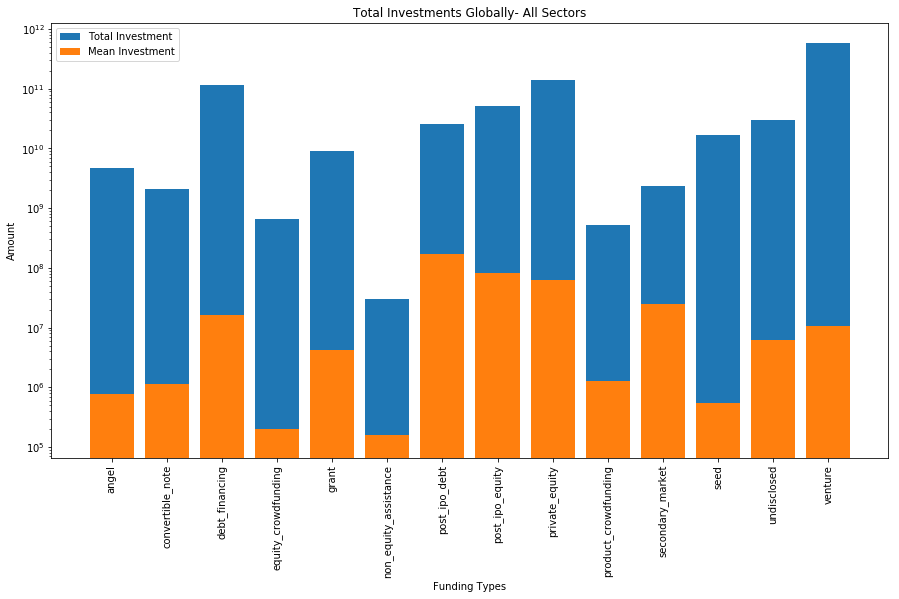

In [20]:
#plot 1:
try:
    print("plot 1")
    plt.figure(figsize=(15,8))
    plt.title("Total Investments Globally- All Sectors")
    TotalInvestmentsGlobal=cleanedData.groupby('funding_round_type')['raised_amount_usd'].sum().reset_index(drop=False)
    averageTable=averageTable.reset_index(drop=False)
    plt.yscale("log")
    plt.xlabel("Funding Types")
    plt.ylabel("Amount")
    plt.bar(TotalInvestmentsGlobal["funding_round_type"],TotalInvestmentsGlobal["raised_amount_usd"],label='Total Investment')
    plt.xticks(rotation=90)
    plt.bar(averageTable.index,averageTable["raised_amount_usd"],label='Mean Investment')
    plt.legend(loc='best')
    plt.show()
except Exception as e:
    print("exception= "+str(e))

Plot 2


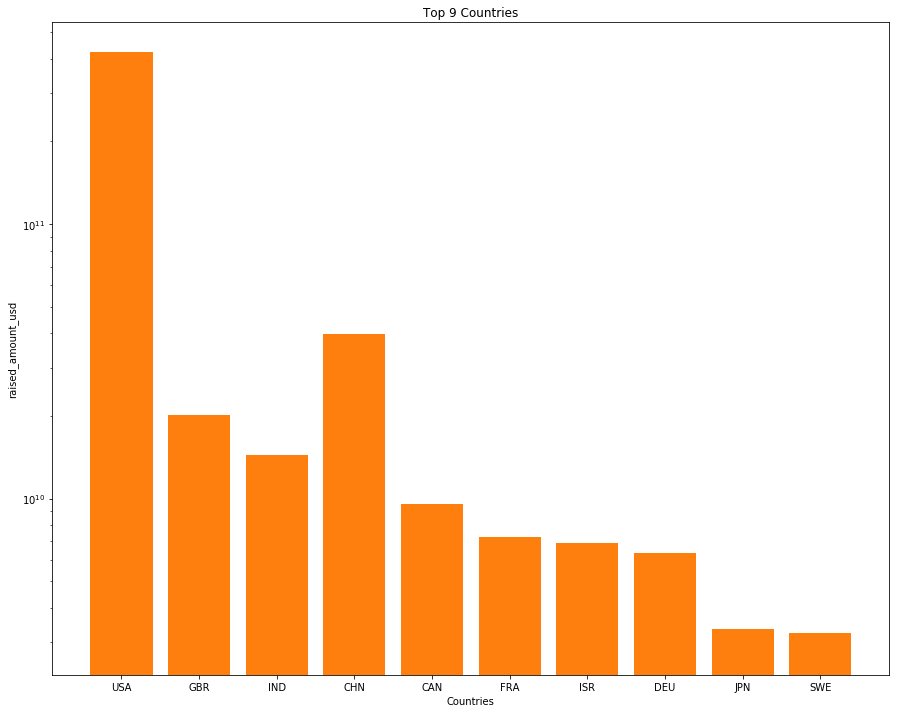

In [21]:
#plot 2:
try:
    print("Plot 2")
    plt.figure(figsize=(15,12))
    plt.title("Top 9 Countries")
    plt.yscale("log")
    plt.xlabel("Countries")
    plt.ylabel("raised_amount_usd")
    plt.bar(top_3["country_code"],top_3["raised_amount_usd"])
    plt.bar(top_9["country_code"],top_9["raised_amount_usd"])
    plt.show()
except Exception as e:
    print("exception= "+str(e))

Plot 3


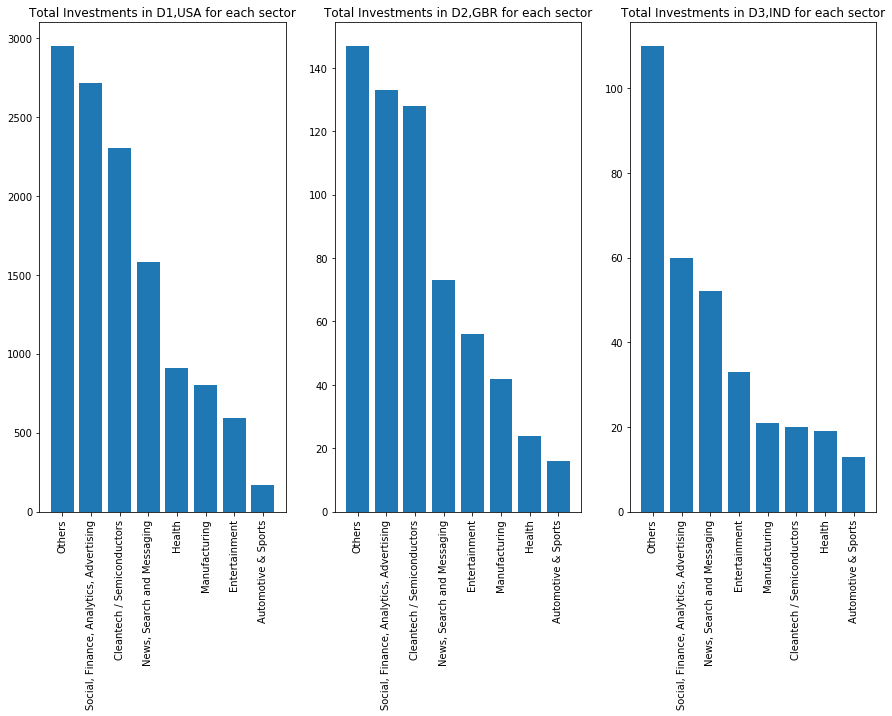

In [22]:
try:
    print("Plot 3")
    plt.figure(figsize=(15,9))
    plt.yscale("log")
    plt.xlabel("Top 3 Sectors")
    plt.ylabel("Total Number of Investments in Main Sectors")

    #1st subplot
    subplotAlabel="Total Investments in D1," +top_3.values[0][0]+" for each sector"
    plt.subplot(131)
    plt.title(subplotAlabel)
    plt.xticks(rotation=90)
    plt.bar(TotalInvestmentsD1["main_sector"],TotalInvestmentsD1["count_investments"])
    #2nd subplot
    subplotAlabel="Total Investments in D2," +top_3.values[1][0]+" for each sector"
    plt.subplot(132)
    plt.title(subplotAlabel)
    plt.xticks(rotation=90)
    plt.bar(TotalInvestmentsD2["main_sector"],TotalInvestmentsD2["count_investments"])
    #3rd subplot
    subplotAlabel="Total Investments in D3," +top_3.values[2][0]+" for each sector"
    plt.subplot(133)
    plt.title(subplotAlabel)
    plt.xticks(rotation=90)
    plt.bar(TotalInvestmentsD3["main_sector"],TotalInvestmentsD3["count_investments"])
except Exception as e:
    print("exception= "+str(e))

# End Of Analysis